In [20]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

df1 = df[['Gender', 'Age', 'Occupation', 'City_Category',
'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
'Product_Category_2', 'Product_Category_3', 'Purchase']]

df1['Product_Category_2'].fillna(0, inplace=True)
df1['Product_Category_3'].fillna(0, inplace=True)

object_names = ['Gender','Age',
                'City_Category',
                'Stay_In_Current_City_Years',
                'Marital_Status']

dataset = pd.get_dummies(df1,
                         columns=object_names,
                         drop_first=True)

dataset.info()

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 19 columns):
Occupation                       550068 non-null int64
Product_Category_1               550068 non-null int64
Product_Category_2               550068 non-null float64
Product_Category_3               550068 non-null float64
Purchase                         550068 non-null int64
Gender_M                         550068 non-null uint8
Age_18-25                        550068 non-null uint8
Age_26-35                        550068 non-null uint8
Age_36-45                        550068 non-null uint8
Age_46-50                        550068 non-null uint8
Age_51-55                        550068 non-null uint8
Age_55+                          550068 non-null uint8
City_Category_B                  550068 non-null uint8
City_Category_C                  550068 non-null uint8
Stay_In_Current_City_Years_1     550068 non-null uint8
Stay_In_Current_City_Years_2     550068 non-null uint8
Stay_

In [21]:
sample_df = dataset.sample(frac=0.20)

In [22]:
sample_df.shape

(110014, 19)

In [23]:
dataset.shape

(550068, 19)

In [11]:
np.max(dataset['Purchase'])

23961

In [3]:
dataset.isna().any()

Occupation                       False
Product_Category_1               False
Product_Category_2               False
Product_Category_3               False
Purchase                         False
Gender_M                         False
Age_18-25                        False
Age_26-35                        False
Age_36-45                        False
Age_46-50                        False
Age_51-55                        False
Age_55+                          False
City_Category_B                  False
City_Category_C                  False
Stay_In_Current_City_Years_1     False
Stay_In_Current_City_Years_2     False
Stay_In_Current_City_Years_3     False
Stay_In_Current_City_Years_4+    False
Marital_Status_1                 False
dtype: bool

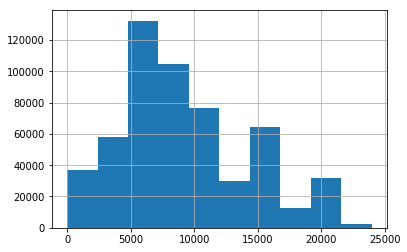

In [4]:
dataset['Purchase'].hist()

In [25]:
sample_df['log_purchase'] = np.log(sample_df['Purchase'])

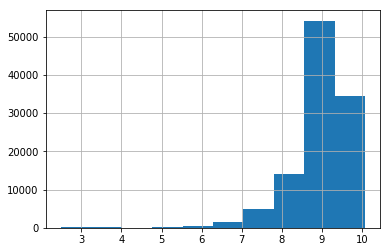

In [26]:
sample_df['log_purchase'].hist()
plt.show()

In [28]:
X = sample_df.drop(columns=['Purchase','log_purchase'])
y = sample_df['log_purchase']

In [29]:
from __future__ import division
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
print("Train size is: {}".format(X_train.shape))
print("Test size is: {}".format(X_test.shape))

Train size is: (88011, 18)
Test size is: (22003, 18)


In [32]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

## Random Forest

In [34]:
start = time.time()

np.random.seed(7)
model = RandomForestRegressor(n_estimators=500,max_depth=60,random_state=7)
model.fit(X_train,y_train)

end = time.time()
print (end - start)

y_pred_train = model.predict(X_train)
print('Train',np.sum(np.abs(np.exp(y_pred_train)-np.exp(y_train))/np.exp(y_train)<0.25)/y_train.shape[0])

y_pred_test = model.predict(X_test)
print('Validation',np.sum(np.abs(np.exp(y_pred_test)-np.exp(y_test))/np.exp(y_test)<0.25)/y_test.shape[0])

print(np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_test))))

118.10078716278076
Train 0.7788117394416607
Validation 0.5745580148161614
3224.150338493422


## Deep Learning

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from keras.optimizers import Adam
import keras.backend as K
np.random.seed(7)
dims = X_train.shape[1]
learning_rate = 0.001
training_epochs = 50
display_step = 200
factor = 0.25
batch = 128
seed = 7
beta_1 = 0.9
beta_2 = 0.999
epsilon = None
decay = 0.001
np.random.seed(seed)
K.clear_session()
model = Sequential()
model.add(Dense(225, input_shape=(dims,), activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(115, activation = 'relu'))
model.add(Dense(55, activation = 'relu'))
model.add(Dense(27, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))
model.compile(Adam(lr=learning_rate), 'mean_squared_error')

start = time.time()
print("Building model..." )
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=training_epochs, 
          batch_size=batch,
          verbose=1)
end = time.time()
print("Done training...")
print("time elapsed:%.2f"%(end-start))

Building model...
Train on 440054 samples, validate on 110014 samples
Epoch 1/50
440054/440054 [==============================] - 8s 19us/step - loss: 0.8492 - val_loss: 0.3168
Epoch 2/50
440054/440054 [==============================] - 9s 21us/step - loss: 0.2703 - val_loss: 0.2410
Epoch 3/50
440054/440054 [==============================] - 13s 29us/step - loss: 0.2233 - val_loss: 0.2150
Epoch 4/50
440054/440054 [==============================] - 9s 21us/step - loss: 0.2072 - val_loss: 0.1798
Epoch 5/50
440054/440054 [==============================] - 9s 20us/step - loss: 0.1958 - val_loss: 0.2019
Epoch 6/50
440054/440054 [==============================] - 8s 19us/step - loss: 0.1941 - val_loss: 0.1639
Epoch 7/50
440054/440054 [==============================] - 9s 20us/step - loss: 0.1826 - val_loss: 0.1714
Epoch 8/50
440054/440054 [==============================] - 9s 21us/step - loss: 0.1780 - val_loss: 0.1649
Epoch 9/50
440054/440054 [==============================] - 10s 24us/step

In [14]:
model.save('purchase_predictor.h5')

In [ ]:
model_dl = 

In [ ]:
y_pred_train = model.predict(X_train)
print('Train',np.sum(np.abs(np.exp(y_pred_train)-np.exp(y_train))/np.exp(y_train)<0.25)/y_train.shape[0])

In [26]:
y_pred_test = model.predict(X_test)
print('Validation',np.sum(np.abs(np.exp(y_pred_test)-np.exp(y_test))/np.exp(y_test)<0.25)/y_test.shape[0])

print(np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_test))))

37.71666666666667

In [ ]:
y_pred_train = model.predict(X_train, verbose=1)
print('Train',np.sum(np.abs(np.exp(y_pred_train)-np.exp(y_train))/np.exp(y_train)<0.25)/y_train.shape[0])

# y_pred_test = model.predict(X_test)
# print('Validation',np.sum(np.abs(np.exp(y_pred_test)-np.exp(y_test))/np.exp(y_test)<0.25)/y_test.shape[0])

# print(np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_test))))

440054/440054 [==============================] - 8s 19us/step


In [1]:
history.history

NameError: name 'history' is not defined